In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [26]:
def muestra(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.xticks([]),plt.yticks([]) #Ocultar ejes
    plt.show()

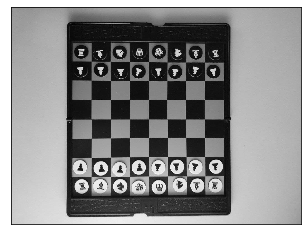

In [28]:
img = cv2.imread("./javih/imgs/tableros/04.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
muestra(img)

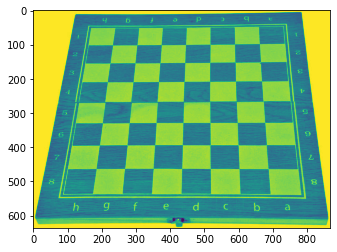

In [4]:
plt.imshow(img)


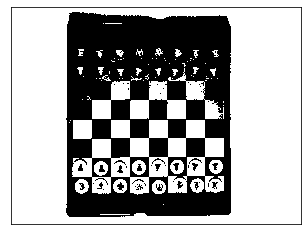

In [209]:
ret,thresh1 = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
#FLOODFILL
mask = np
muestra(thresh1)

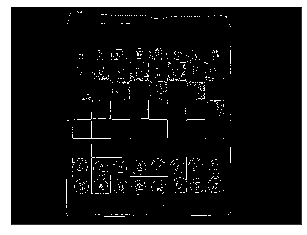

In [212]:
canny = cv2.Canny(thresh1, 200, 500)
muestra(canny)

In [8]:
    cdst = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv2.HoughLines(canny, 1, np.pi/180, 150, None, 0, 0)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (255,255,255), 3, cv2.LINE_AA)
            
    linesP = cv2.HoughLinesP(canny, 1, np.pi/50000, 500, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

In [9]:
print(lines[0])


[[18.        1.553343]]


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

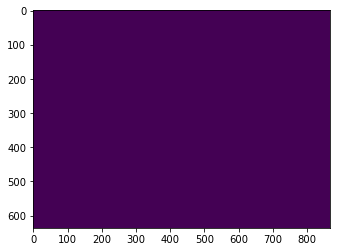

In [5]:

cdst = cv2.cvtColor(cdst, cv2.COLOR_BGR2GRAY)
plt.imshow(cdst)
corners = cv2.goodFeaturesToTrack(cdst, 4,0.8,1000)
corners = np.int0(corners)
print(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,1,-1)

In [11]:
mask = cv2.inRange(cdst, np.array([0,0,0]) , np.array([0,0,255]))
res = cv2.bitwise_and(cdst, cdst, mask = mask)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-zsozjuva\opencv\modules\core\src\arithm.cpp:1759: error: (-209:Sizes of input arguments do not match) The lower boundary is neither an array of the same size and same type as src, nor a scalar in function 'cv::inRange'


In [ ]:
def line_intersection(line1, line2):
    xdiff = (line1[0] - line1[1], line2[0] - line2[1])
    ydiff = (line1[0] - line1[1], line2[0] - line2[1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [ ]:
persp = cv2.getPerspectiveTransform(puntos1, puntos2)
dst = cb2.warpPerspective(img, persp, tamanoFinalImagen)
plt.imshow(dst)

In [3]:
    cdst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv2.HoughLines(img, 1, np.pi/180, 150, None, 0, 0)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (255,255,255), 3, cv2.LINE_AA)

In [4]:
print(len(lines))

8767


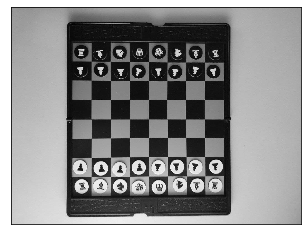

In [52]:
muestra(img)

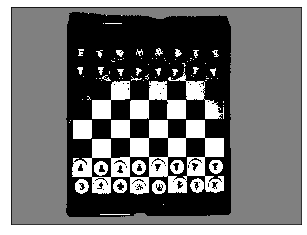

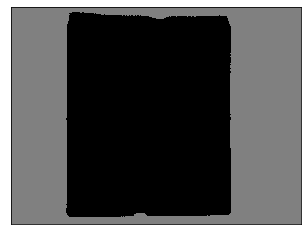

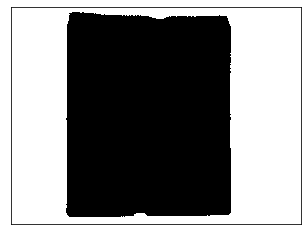

In [206]:
flood = thresh1.copy()
cv2.floodFill(flood, None, (0,0), 128, upDiff=0, loDiff=254)
muestra(flood)
ret,flooded = cv2.threshold(flood, 128, 255, cv2.THRESH_TOZERO_INV)
muestra(flooded)
ret,roi = cv2.threshold(flooded, 127, 255, cv2.THRESH_BINARY)
muestra(roi)

In [136]:
roi

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [121]:
m = roi == 0

In [156]:
def get_height(roi):
    #devuelve en el primer valor el ancho mas grande del roi y en el segundo el valor de su i
    m = roi == 0
    res = 0
    resi = 0
    for j in range(roi.shape[1]):
        height = sum(map(lambda p: 1 if p else 0, m[:,j]))
        if height > res:
            res = height
            resi = primerT(m[:,j])
            
   
            
    return res, resi

In [213]:
def get_width(roi):
    #devuelve en el primer valor la altura mayor  del roi y en el segundo el valor de su j
    m = roi == 0
    res = 0
    for i in range(roi.shape[0]):
        width = sum(map(lambda p: 1 if p else 0, m[i,:]))
        if width > res:
            res = width
            resj = primerT(m[i,:])
            
   
            
    return res, resj

In [150]:
def primerT(linea):
    for i in range(linea.shape[0]):
        if linea[i] == True:
            return i

In [194]:
get_width(roi)

(727, 244)

In [195]:
get_height(roi)

(906, 23)

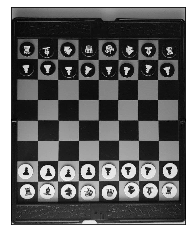

In [196]:
img2 = img[23:23+906, 244:244+727]
muestra(img2)